## 기본 챗봇 구축 연습

목표
- StateGraph와 `messages` 상태를 정의하고, 간단한 챗봇 노드를 만들어 그래프를 실행합니다.
- START → chatbot → END 경로를 구성합니다.

요구사항
- `State` TypedDict에 `messages: Annotated[list, add_messages]`를 정의하세요.
- `ChatOpenAI` 모델(gpt-4.1, temperature=0)로 마지막 메시지를 받아 응답을 반환하는 `chatbot` 노드를 구현하세요.
- 그래프를 compile 한 뒤, `HumanMessage` 1개로 실행하고 응답을 확인하세요.


In [1]:
from dotenv import load_dotenv
from langchain_teddynote import logging

load_dotenv(override=True)

# 프로젝트 이름
logging.langsmith("LangGraph-Exercises")

LangSmith 추적을 시작합니다.
[프로젝트명]
LangGraph-Exercises


In [2]:
# Part 1 준비 코드
from typing import Annotated
from typing_extensions import TypedDict
from dotenv import load_dotenv

from langchain_teddynote import logging
from langchain_openai import ChatOpenAI
from langchain_core.messages import HumanMessage
from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages

### 1. 모델을 생성해 주세요.

- 사용 모델: `ChatOpenAI`, 모델명: `gpt-4.1`, 온도: `0`

In [4]:
# 실습 코드
# TODO: LLM 모델을 정의해 주세요.
llm = ChatOpenAI(model="gpt-4.1-nano", temperature=0)

### 2. State 정의

- 그래프에서 사용할 State를 정의해 주세요.

In [5]:
# 실습 코드
# TODO: 그래프에서 사용할 State를 정의해 주세요.

class State(TypedDict):
    messages: [list, add_messages]# 코드 입력: add_messages 사용

### 3. Chatbot 노드 작성

- Chatbot 노드를 작성해 주세요.
- 노드에서는 LLM 의 추론이 이루어 집니다.
- 반환 형식은 `messages` 키에 응답을 배열로 담아 반환해 주세요.

In [6]:
response = llm.invoke("넌누구니")

'안녕하세요! 저는 OpenAI가 개발한 인공지능 언어 모델인 ChatGPT입니다. 궁금한 점이나 도움이 필요하시면 언제든 말씀해 주세요!'

In [9]:
# 실습 코드
# TODO: state["messages"]를 모델에 전달하고, 응답을 반환
# 응답 반환시 스키마에 유념하세요.



def chatbot(state: State):
    response = llm.invoke(state["messages"])
    return {
        "messages" : response.content
    }

### 4. 그래프 생성

- 그래프는 `StateGraph` 를 사용해 주세요.
- 그래프는 `START` → `chatbot` → `END` 경로를 가지도록 주세요.

In [10]:
# 실습 코드
# TODO: 노드를 정의하고 엣지를 구성해 주세요.

builder = StateGraph(State)
builder.add_node("chatbot",chatbot)
builder.add_edge(START,"chatbot")
builder.add_edge("chatbot",END)

app = builder.compile()

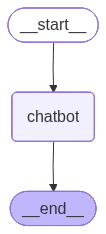

In [11]:
app

### 5. 그래프 시각화

- 컴파일한 그래프를 시각화 하세요.

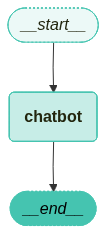

In [12]:
# 실습 코드
# TODO: 그래프를 시각화 하세요.

from langchain_teddynote.graphs import visualize_graph

visualize_graph(app)

### 6. 그래프 실행

- 메시지를 입력하고 결과를 출력하세요.

In [25]:
# 실습 코드
# TODO: 메시지를 입력하고 결과를 출력하세요.
from langchain_teddynote.messages import stream_graph, invoke_graph
from langchain_core.runnables import RunnableConfig
config = RunnableConfig(recursion_limit=10)

inputs = {
    "messages": [
        HumanMessage(content="이번 주 팀 회의 공지 초안을 4문장으로 작성해줘.")
    ]
}
stream_graph(app, config = config, inputs=inputs)


🔄 Node: chatbot 🔄
- - - - - - - - - - - - - - - - - - - - - - - - - 
안녕하세요, 팀원 여러분. 이번 주 팀 회의는 목요일 오후 3시에 진행될 예정입니다. 회의에서는 지난 프로젝트 진행 상황과 앞으로의 계획을 공유할 예정이니 참석 부탁드립니다. 자세한 내용은 추후 다시 공지하겠습니다.

In [19]:
inputs

{'messages': [HumanMessage(content='이번 주 팀 회의 공지 초안을 4문장으로 작성해줘.', additional_kwargs={}, response_metadata={})]}